In [1]:
import numpy as np
import pandas as pd

In [2]:
from bokeh.plotting import figure, show
from bokeh.io import push_notebook, show, output_notebook
from bokeh.models import Span, Arrow, VeeHead, OpenHead
output_notebook()

Loading BokehJS ...

In [3]:
import matplotlib.pyplot as plt1
%matplotlib notebook

In [41]:
def lanza_proyectil(altura=1, 
                    velocidad=20, 
                    grados=15, 
                    gravedad=9.8,
                    with_plot=True,
                    predict=False,
                   ):
    
    # deg2rad - Convert angles from degrees to radians.
    vel_x = velocidad * np.cos(np.deg2rad(grados))
    vel_theta = velocidad * np.sin(np.deg2rad(grados))
    
    # Creamos la trayectoria
    trayectoria = []
    segundos = 0.05
    t = 0
    y = altura
    while y >= 0:
        x = vel_x * t
        y =  (vel_theta * t - segundos * gravedad * t**2) + altura
        trayectoria.append({"x": x, "y": y})
        t = t + segundos
    
    # Creamos Dataframe y extraemos punto de impacto
    trayectoria = pd.DataFrame(trayectoria)
    impacto = round(float(trayectoria["x"][-1:]), 2)
    
    if with_plot==True:
        print("Velocidad: %s - Grados: %s - Gravedad: %s" % (velocidad, grados, gravedad))
        plot_trayectoria(trayectoria, predict)
    
    
    return trayectoria, impacto

In [11]:
lanza_proyectil()

Velocidad: 20 - Grados: 15 - Gravedad: 9.8


(              x         y
 0      0.000000  1.000000
 1      0.965926  1.257594
 2      1.931852  1.512738
 3      2.897777  1.765432
 4      3.863703  2.015676
 5      4.829629  2.263470
 6      5.795555  2.508814
 7      6.761481  2.751708
 8      7.727407  2.992152
 9      8.693332  3.230146
 10     9.659258  3.465690
 11    10.625184  3.698784
 12    11.591110  3.929429
 13    12.557036  4.157623
 14    13.522962  4.383367
 15    14.488887  4.606661
 16    15.454813  4.827505
 17    16.420739  5.045899
 18    17.386665  5.261843
 19    18.352591  5.475337
 20    19.318517  5.686381
 21    20.284442  5.894975
 22    21.250368  6.101119
 23    22.216294  6.304813
 24    23.182220  6.506057
 25    24.148146  6.704851
 26    25.114071  6.901195
 27    26.079997  7.095089
 28    27.045923  7.286533
 29    28.011849  7.475527
 ..          ...       ...
 187  180.628130  6.562136
 188  181.594055  6.361580
 189  182.559981  6.158575
 190  183.525907  5.953119
 191  184.491833  5.745213
 

In [45]:
def plot_trayectoria(trayectoria, predict=False):
    
    impacto = round(float(trayectoria["x"][-1:]), 2)
    altura_maxima = trayectoria["y"].max()
    
    p = figure(
        title="Impacto: %s " % impacto,
        x_axis_label="Distancia - Metros",
        y_axis_label="Altura - Metros",
        width = 750, height=200)

    # Pintar la trayectoria
    p.line(trayectoria["x"], trayectoria["y"],
          legend="Trayectoria",
           line_width=1,
           line_color="darkred"
          )
    
    # Pintamos el pundo de impacto
    p.add_layout(Arrow(end=OpenHead(size=10),
                      line_color="green",
                       line_dash="dashed",
                       line_width=2,
                       x_start=impacto, y_start=altura_maxima/2,
                       x_end=impacto, y_end=0
                      ))
    
    # Pintamos la línea de altura máxima
    altitude_line = Span(location=altura_maxima,
                        line_color="orange",
                         line_dash="dotted",
                         line_width=1.5)
    p.add_layout(altitude_line)
    
    # Pintamos la marca de predicción
    if predict:
        p.add_layout(Arrow(end=VeeHead(size=5),
                           line_color="blue",
                           line_dash="dotdash",
                           line_width=2,
                           x_start=predict, y_start=altura_maxima/2,
                           x_end=predict, y_end=0))
    
    show(p)
        

In [8]:
trayectoria, impacto = lanza_proyectil()
plot_trayectoria(trayectoria)

In [12]:
for vel in [10, 20, 30]:
    for grds in [0, 10, 15]:
        trayectoria, impacto = lanza_proyectil(altura=1.5, velocidad=vel, grados=grds)

Velocidad: 10 - Grados: 0 - Gravedad: 9.8


Velocidad: 10 - Grados: 10 - Gravedad: 9.8


Velocidad: 10 - Grados: 15 - Gravedad: 9.8


Velocidad: 20 - Grados: 0 - Gravedad: 9.8


Velocidad: 20 - Grados: 10 - Gravedad: 9.8


Velocidad: 20 - Grados: 15 - Gravedad: 9.8


Velocidad: 30 - Grados: 0 - Gravedad: 9.8


Velocidad: 30 - Grados: 10 - Gravedad: 9.8


Velocidad: 30 - Grados: 15 - Gravedad: 9.8


# Creamos un dataset de entreno

In [14]:
data = []

gravedad = 9.8
altura=[1, 1.5, 2, 3, 4, 5]
velocidad=range(1,50)
grados=range(1,89)

for vel in velocidad:
    for grds in grados:
        for alt in altura:
            trayectoria, impacto = lanza_proyectil(
                altura=alt,
                velocidad=vel,
                grados=grds,
                gravedad=gravedad,
                with_plot=False
            )
            data.append({
                "altura": alt,
                "velocidad": vel,
                "grados": grds,
                "gravedad": gravedad,
                "impacto": impacto
            })
data = pd.DataFrame(data)
data.head()

,altura,grados,gravedad,impacto,velocidad
0,1.0,1,9.8,1.45,1
1,1.5,1,9.8,1.80,1
2,2.0,1,9.8,2.05,1
3,3.0,1,9.8,2.50,1
4,4.0,1,9.8,2.90,1


In [15]:
data.shape[0]

25872

In [16]:
data.describe()

,altura,grados,gravedad,impacto,velocidad
count,25872.000000,25872.000000,25872.0,25872.000000,25872.000000
mean,2.750000,44.500000,9.8,553.635589,25.000000
std,1.406856,25.402263,0.0,586.828285,14.142409
min,1.000000,1.000000,9.8,0.100000,1.000000
25%,1.500000,22.750000,9.8,85.995000,13.000000
50%,2.500000,44.500000,9.8,327.405000,25.000000
75%,4.000000,66.250000,9.8,860.080000,37.000000
max,5.000000,88.000000,9.8,2456.560000,49.000000


# Creamos un modelo y lo entrenoamos con nuestro set de datos

In [18]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    data[["altura", "velocidad", "grados", "gravedad"]],
    data["impacto"],
    test_size=20,
    random_state=42)


In [20]:
y_train.get_values()

array([ 1988.68,  1398.21,   219.08, ...,     4.86,   284.4 ,  1273.13])

In [28]:
mlp = MLPRegressor(
    hidden_layer_sizes=(100,100,100,100),
    learning_rate_init=0.00001,
    tol=0.000001,
    max_iter=1000,
    verbose=True,)
model = mlp.fit(X_train.get_values(), y_train.get_values())

Iteration 1, loss = 320236.55259037
Iteration 2, loss = 316608.08002914
Iteration 3, loss = 312014.00818322
Iteration 4, loss = 306124.04914904
Iteration 5, loss = 298432.50233086
Iteration 6, loss = 288429.10761998
Iteration 7, loss = 275773.58875100
Iteration 8, loss = 260882.31034638
Iteration 9, loss = 244362.54987717
Iteration 10, loss = 226649.77513741
Iteration 11, loss = 208468.54456190
Iteration 12, loss = 190526.16502439
Iteration 13, loss = 173662.03387878
Iteration 14, loss = 158515.38478224
Iteration 15, loss = 145326.94944201
Iteration 16, loss = 133968.31218664
Iteration 17, loss = 124061.94404266
Iteration 18, loss = 115101.91013793
Iteration 19, loss = 106847.41642386
Iteration 20, loss = 99028.44889985
Iteration 21, loss = 91477.42653363
Iteration 22, loss = 84307.63481652
Iteration 23, loss = 77795.88405130
Iteration 24, loss = 71836.91835233
Iteration 25, loss = 66488.97226471
Iteration 26, loss = 61873.08335134
Iteration 27, loss = 57844.43396485
Iteration 28, loss

Iteration 229, loss = 1618.49575868
Iteration 230, loss = 1593.88521162
Iteration 231, loss = 1569.60544575
Iteration 232, loss = 1543.90490701
Iteration 233, loss = 1523.28799403
Iteration 234, loss = 1494.36855170
Iteration 235, loss = 1477.75945278
Iteration 236, loss = 1451.42581539
Iteration 237, loss = 1422.95735820
Iteration 238, loss = 1401.35686529
Iteration 239, loss = 1380.24892324
Iteration 240, loss = 1361.18911175
Iteration 241, loss = 1338.44805316
Iteration 242, loss = 1315.81216130
Iteration 243, loss = 1290.85394454
Iteration 244, loss = 1270.77333939
Iteration 245, loss = 1248.37406203
Iteration 246, loss = 1227.53690420
Iteration 247, loss = 1207.88446114
Iteration 248, loss = 1186.63046204
Iteration 249, loss = 1166.57403596
Iteration 250, loss = 1152.53934580
Iteration 251, loss = 1127.30042193
Iteration 252, loss = 1106.35648996
Iteration 253, loss = 1086.77172000
Iteration 254, loss = 1071.66762569
Iteration 255, loss = 1054.10316475
Iteration 256, loss = 1031.0

Iteration 465, loss = 40.90612787
Iteration 466, loss = 41.59533843
Iteration 467, loss = 40.05117475
Iteration 468, loss = 40.47149539
Iteration 469, loss = 39.34964395
Iteration 470, loss = 40.01628642
Iteration 471, loss = 38.90270262
Iteration 472, loss = 38.45942546
Iteration 473, loss = 37.69972090
Iteration 474, loss = 37.53793845
Iteration 475, loss = 37.56711624
Iteration 476, loss = 37.65805188
Iteration 477, loss = 37.02322889
Iteration 478, loss = 36.83227297
Iteration 479, loss = 36.55476977
Iteration 480, loss = 36.09523699
Iteration 481, loss = 35.60319782
Iteration 482, loss = 35.83014033
Iteration 483, loss = 35.80227202
Iteration 484, loss = 34.69988615
Iteration 485, loss = 35.63524672
Iteration 486, loss = 34.67621098
Iteration 487, loss = 33.93599478
Iteration 488, loss = 34.04650755
Iteration 489, loss = 34.41066714
Iteration 490, loss = 33.99328734
Training loss did not improve more than tol=0.000001 for two consecutive epochs. Stopping.


In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score

y_pred = model.predict(X_test.get_values())

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print("mse: %s" % mse)
print("mae: %s" % mae)
print("evs: %s" % evs)


mse: 81.6659676671
mae: 6.41344152901
evs: 0.999857631482


# Probamos el algoritmo


In [30]:
import random

In [50]:
def gen_test(rows=5, with_plot=False):
    test_data = []
    for r in range(0, rows):
        
        velocidad=random.randint(1,50)
        grados=random.randint(10,80)
        gravedad=9.8
        altura=random.choice([1, 1.5, 2, 3, 4, 5])
        
        test_data.append({
            "altura": altura,
            "velocidad": velocidad, 
            "grados": grados,
            "gravedad": gravedad,
        })
        
    test_data = pd.DataFrame(test_data)
    test_data["predict"] = model.predict(
        test_data[["altura", "velocidad", "grados", "gravedad"]]
    )
    
    impactos = []
    for row in test_data.iterrows():
        
        trayectoria, impacto = lanza_proyectil(
            altura=row[1]["altura"],
            velocidad=row[1]["velocidad"],
            grados=row[1]["grados"],
            gravedad=row[1]["gravedad"],
            with_plot=with_plot,
            predict=row[1]["predict"],
        )
        impactos.append(impacto)
    
    test_data["impacto"]=impactos
    test_data["predict_error"]=test_data["impacto"]-test_data["predict"]
    
    return test_data
    
    

In [51]:
gen_test(with_plot=True)

Velocidad: 46.0 - Grados: 55.0 - Gravedad: 9.8


Velocidad: 50.0 - Grados: 16.0 - Gravedad: 9.8


Velocidad: 21.0 - Grados: 71.0 - Gravedad: 9.8


Velocidad: 11.0 - Grados: 45.0 - Gravedad: 9.8


Velocidad: 36.0 - Grados: 20.0 - Gravedad: 9.8


,altura,grados,gravedad,velocidad,predict,impacto,predict_error
0,2,55,9.8,46,2025.512727,2031.61,6.097273
1,5,16,9.8,50,1375.330574,1369.80,-5.530574
2,1,71,9.8,21,271.867018,277.58,5.712982
3,2,45,9.8,11,117.335872,125.62,8.284128
4,4,20,9.8,36,856.939226,860.95,4.010774


In [53]:
test_data = gen_test(rows=10000)

# Mostramos los resultados de la calidad del moldelo en gráficas

In [54]:
import seaborn as sns

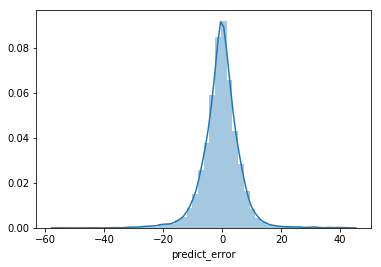

In [55]:
sns.distplot(test_data["predict_error"])

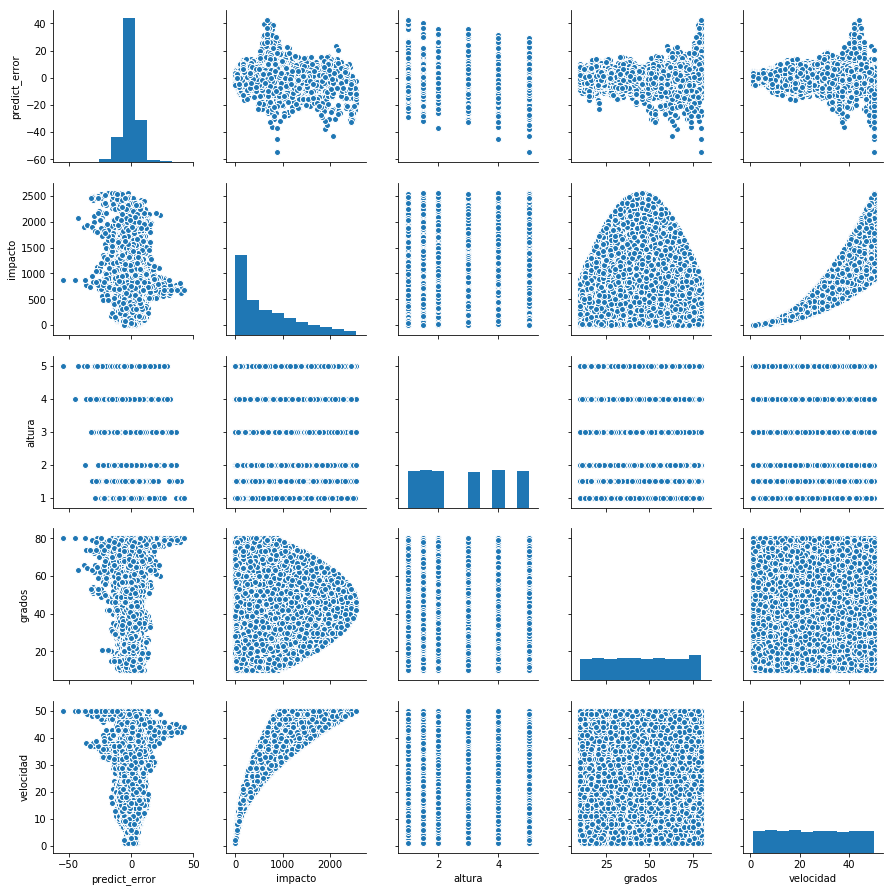

In [56]:
sns.pairplot(test_data, vars=["predict_error", "impacto", "altura", "grados", "velocidad",])